In [16]:
import os
import gnssrefl.gps as g
import gnssrefl.rinex2snr as rnx
import gnssrefl.quickLook_function as quick
import gnssrefl.gnssir as guts

import check_parameters

from IPython.display import Image


%matplotlib inline

# Setting up environment variables
# will check if already set. If not, then create them inside this working directory
try:
  %env 'ORBITS'
except:
    orbits_dir = os.getcwd() + '/orbits'
    %set_env ORBITS $orbits_dir
    pass

try:
  %env 'EXE'
except:
    exe_dir = os.getcwd() + '/exe'
    %set_env EXE $exe_dir
    pass

try:
  %env 'REFL_CODE'
except:
    refl_code_dir = os.getcwd()
    %set_env REFL_CODE $refl_code_dir
    pass

print(os.environ['ORBITS'])
print(os.environ['EXE'])
print(os.environ['REFL_CODE'])

# making sure that env variables are set - if they are then None
g.check_environ_variables()

env: ORBITS=/Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples/orbits
env: EXE=/Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples/exe
env: REFL_CODE=/Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples
/Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples/orbits
/Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples/exe
/Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples


# Use case - Testing the code for p041

I will use a site in Boulder, Colorado (p041) to show you some of the features of the code and the data. The p041 antenna is ~2 meters tall. The site is relatively planar and free of obstructions. Since October 2018 the site has operated a Septentrio receiver. It has multi-GNSS signals in the default RINEX file and is archived at UNAVCO.

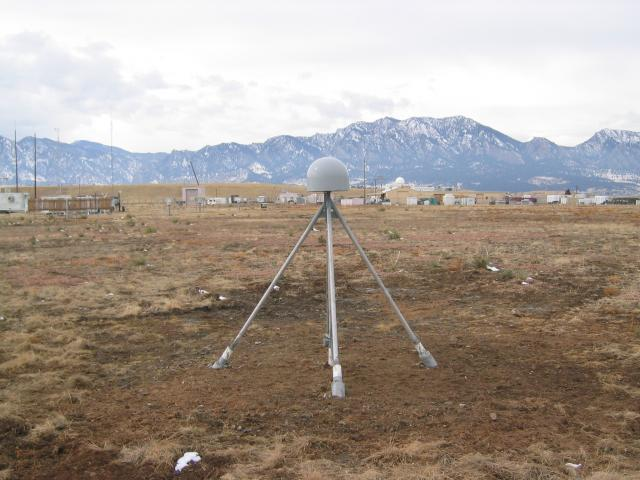

In [2]:
Image("p041.jpeg")

I have made a web tool to give you an idea of the reflection zones for a site that is 2 meters tall. You should only need to enter the station name and the reflector height (2 meters).

First you need to make a SNR file. I will use the defaults, which only translates the GPS signals. If you have Fortran installed:

(command line: rinex2snr p041 2020 132)

If you don't have Fortran installed:

(command line: rinex2snr p041 2020 132 -fortran False)

In [17]:
# For this notebook, fortran is by default FALSE
# params
station = 'p041'
year = 2020
doy= 132

In [18]:
# Check that all the parameters are 
args = check_parameters.rinex2snr(station,year,doy)
#args['station'] = str(station)
rnx.run_rinex2snr(**args)



A SNR file was created: /Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples/2020/snr/p041/p0411320.20.snr66
And I guess my work is done now!


Lets look at the spectral characteristics of the SNR data for the default L1 settings:

(command line: quickLook p041 2020 132)

31162
minimum elevation angle (degrees) for this dataset:  0.0035
Reflector Height results are stored in a file called logs/rh.txt


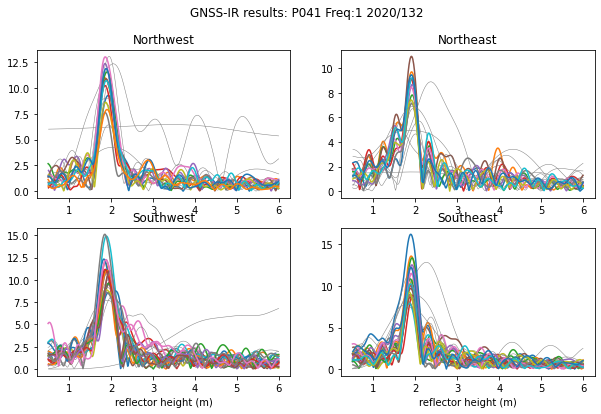

In [8]:
args = check_parameters.quicklook(station, year, doy=doy)
quick.quickLook_function(**args)

The four subplots show you different regions around the antenna. The x-axis tells you reflector height (RH) and the y-axis gives you the spectral amplitude of the SNR data. The multiple colors are used to depict different satellites that rise or set over that section (quadrant) of the field at P041. Which colors go to which satelliets is not super important. The goal of this exercise is to notice that the peaks of those periodograms are lining up around an x value of 2 meters. You also see some skinnier gray data - and those are failed periodograms. This means that the code doesn't believe the results are relevant. I did not originally plot failed periodograms, but people asked for them, and I do think it is useful to see that there is some quality control being used in this code.

I will also point out that these are the data from an excellent receiver, a Septentrio. Not all receivers produce L1 data that are as nice as these. Now try L2C:

31162
minimum elevation angle (degrees) for this dataset:  0.0035
Reflector Height results are stored in a file called logs/rh.txt


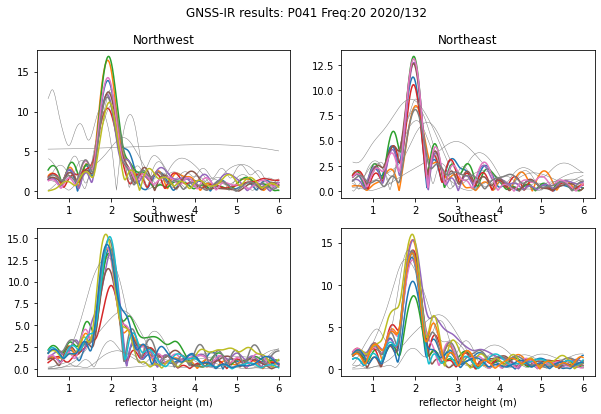

In [19]:
fr = 20
args = check_parameters.quicklook(station, year, doy=doy, f=fr)
quick.quickLook_function(**args)

One thing you can notice here is that there are more colors in the L1 plots than in the L2C plots. That is simply the result of the fact that there are more L1 satellites than L2C satellites.

Now try L5. These are FABULOUS satellites, but unfortunately there are not a lot of them:

31162
minimum elevation angle (degrees) for this dataset:  0.0035
Reflector Height results are stored in a file called logs/rh.txt


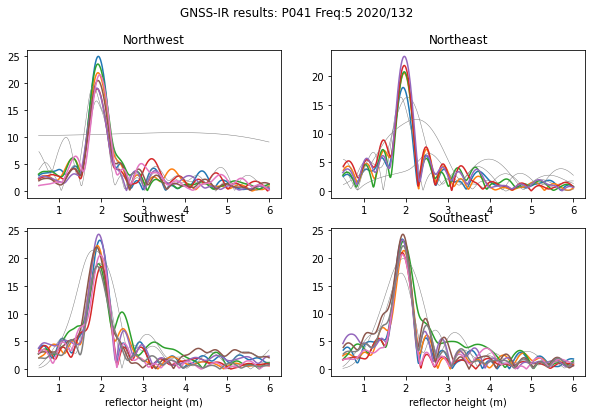

In [20]:
fr = 5
args = check_parameters.quicklook(station, year, doy=doy, f=fr)
quick.quickLook_function(**args)

You can try different things to test the code. For example, you can change the height restrictions:

31162
minimum elevation angle (degrees) for this dataset:  0.0035
Reflector Height results are stored in a file called logs/rh.txt


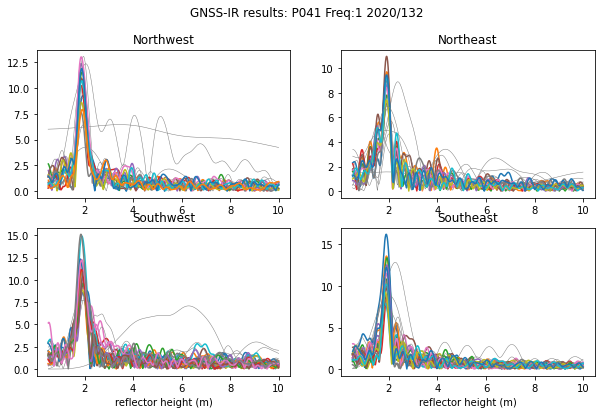

In [13]:
h1 = 0.5
h2 = 10
args = check_parameters.quicklook(station, year, doy=doy, h1=h1, h2=h2)
quick.quickLook_function(**args)

If you want to look at Glonass and Galileo signals, you need to create SNR files using the -orb gnss flag.

In [15]:
orb = 'gnss'
args = check_parameters.rinex2snr(station,year,doy,orb=orb)
rnx.run_rinex2snr(**args)

SNR file already exists /Users/enloe/UNAVCO_Projects/git/gnssrefl/jupyter_examples/2020/snr/p041/p0411320.20.snr66
And I guess my work is done now!


I believe Beidou signals are tracked at this site, but the data are not available in the RINEX 2 file.

quickLook is meant to be a visual assessment of the spectral characteristics. However, it does print out the answers to a file called rh.txt.